<a href="https://colab.research.google.com/github/govardhan-06/ML-models/blob/main/Car%20Price%20Prediction/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
!pip install category_encoders

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
df=pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### EDA + Data preprocessing

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [200]:
#Length of dataset
len(df)

4009

In [201]:
#Null values
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [202]:
#Duplicate rows
duplicate = df[df.duplicated()]
duplicate

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


### Insights: No duplicates

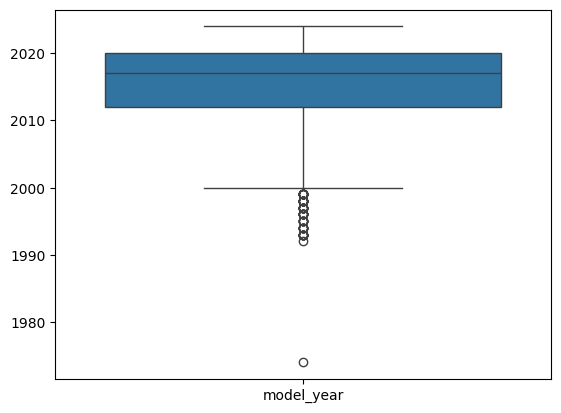

In [203]:
#Outiers
sns.boxplot(data=df)
plt.show()

### Insights: Absence of outliers

In [204]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### Transforming Price to numeric format

In [205]:
df["price (in $)"]=[int(i.strip("$").replace(",","")) for i in df['price']]
df.drop("price",axis=1,inplace=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price (in $)
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


### Transforming milage to suitable format

In [206]:
df['mileage (in miles)']=[int(i.strip("mi.").replace(",","")) for i in df['milage']]
df.drop("milage",axis=1,inplace=True)
df.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,51000
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,34742
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598,22372
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,88900
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999,9835


### `clean_title` column

In [207]:
#Filling null values
df["clean_title"]=df["clean_title"].fillna("No")
df.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,51000
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005,34742
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598,22372
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,88900
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999,9835


In [208]:
df['clean_title'].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [209]:
df.groupby("clean_title")["price (in $)"].mean().sort_values(ascending=False)

clean_title
No     60695.077181
Yes    41734.390272
Name: price (in $), dtype: float64

In [210]:
df["not_clean_title"]=pd.get_dummies(df["clean_title"],dtype=int,drop_first=True)
df.drop(["clean_title"],axis=1,inplace=True)
df.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300,51000,1
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,38005,34742,1
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598,22372,0
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500,88900,1
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,34999,9835,0


### New Feature : `Age of the car model` from `model_year` column

In [211]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Get the current year
current_year = now.year

# Calculate the age of the car
df['Age'] = current_year - df['model_year']

# Drop the 'Year' column
df.drop('model_year', axis=1, inplace=True)

df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,34999,9835,0,3


### Internal Color

In [212]:
print(f"There are {len(df['int_col'].value_counts().index)} categories of internal colours")
print("\n")
print(f"The categories are as follows: {df['int_col'].value_counts().index}")
print("\n")
print(f"Number of null values: {df['int_col'].isnull().sum()}")

There are 156 categories of internal colours


The categories are as follows: Index(['Black', 'Beige', 'Gray', 'Brown', '–', 'White', 'Red', 'Jet Black',
       'Ebony', 'Blue',
       ...
       'Dark Auburn', 'Obsidian Black', 'Boulder', 'Caramel', 'Orchid',
       'Almond Beige', 'Kyalami Orange', 'Sakhir Orange', 'Tan/Ebony',
       'Black / Graphite'],
      dtype='object', name='int_col', length=156)


Number of null values: 0


In [213]:
#List of all the categories
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

In [214]:
#Relation between internal colour and price
print("Grouping by mean of price:\n",df.groupby("int_col")["price (in $)"].mean().sort_values(ascending=False))
print("\n")
print("Grouping by median of price:\n",df.groupby("int_col")["price (in $)"].median().sort_values(ascending=False))

Grouping by mean of price:
 int_col
Charles Blue      695000.0
Cobalt Blue       599995.0
Black / Brown     489000.0
Brandy            479995.0
Grace White       449995.0
                    ...   
Carbon Black       17999.0
Light Titanium     17550.0
Ebony.             14798.0
Charcoal Black     11829.8
Dark Gray          11515.5
Name: price (in $), Length: 156, dtype: float64


Grouping by median of price:
 int_col
Charles Blue      695000.0
Cobalt Blue       599995.0
Black / Brown     489000.0
Brandy            479995.0
Grace White       449995.0
                    ...   
Gold               17750.0
Light Titanium     17550.0
Ebony.             14798.0
Charcoal Black     12599.0
Dark Gray          11515.5
Name: price (in $), Length: 156, dtype: float64


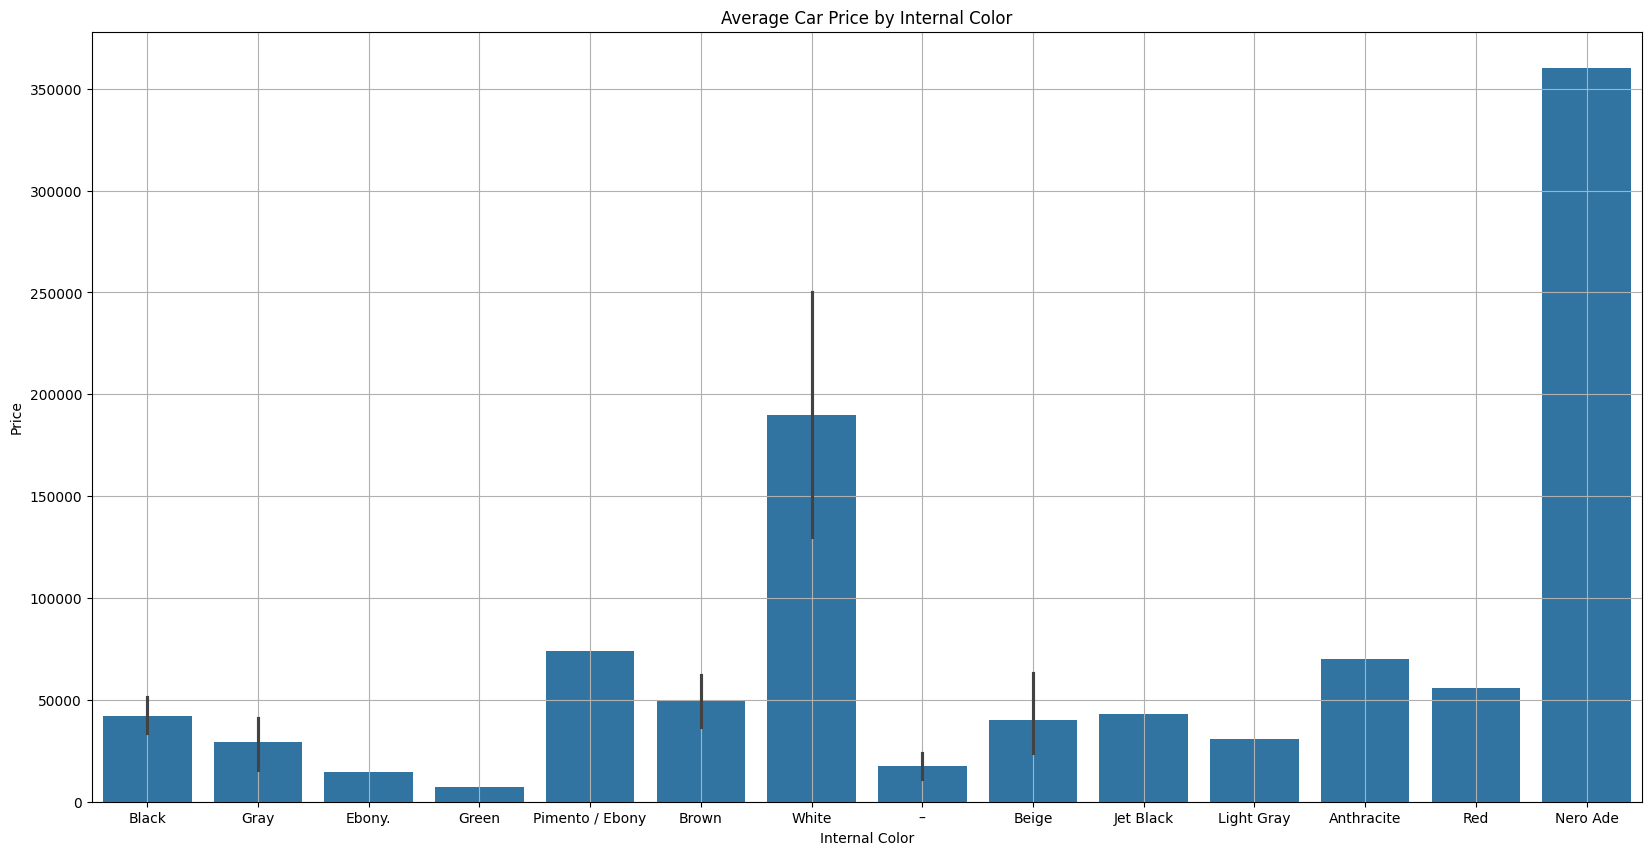

In [215]:
#Influence of internal colour on the price
plt.figure(figsize=(20, 10))
sns.barplot(x=df["int_col"][:80], y=df["price (in $)"])
plt.title('Average Car Price by Internal Color')
plt.xlabel('Internal Color')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [216]:
#Top 15 categories
df['int_col'].value_counts()[:15]

int_col
Black           2025
Beige            538
Gray             472
Brown            157
–                133
White            127
Red              126
Jet Black         59
Ebony             44
Blue              29
Orange            20
Silver            16
Global Black      13
Charcoal          12
Gold              10
Name: count, dtype: int64

In [217]:
print(df.groupby("int_col")["price (in $)"].mean().sort_values(ascending=False)[:15])

int_col
Charles Blue                695000.0
Cobalt Blue                 599995.0
Black / Brown               489000.0
Brandy                      479995.0
Grace White                 449995.0
Giallo Taurus / Nero Ade    399900.0
Nero Ade                    343155.5
Hotspur                     294972.5
Porpoise                    289991.0
Portland                    272950.0
Beluga                      269991.0
Bianco Polar                259991.0
Linen                       219991.0
Agave Green                 179900.0
Hotspur Hide                173995.0
Name: price (in $), dtype: float64


In [218]:
#Transformation
df.loc[:,"int_col"]=np.where(df["int_col"].isin(df['int_col'].value_counts()[:15].index),df["int_col"],"Others")
df.loc[:,"int_col"]=np.where(df["int_col"]!='–',df["int_col"],"Others")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,34999,9835,0,3


In [219]:
df['int_col'].value_counts()

int_col
Black           2025
Beige            538
Gray             472
Others           361
Brown            157
White            127
Red              126
Jet Black         59
Ebony             44
Blue              29
Orange            20
Silver            16
Global Black      13
Charcoal          12
Gold              10
Name: count, dtype: int64

In [289]:
#Relation between internal colors after transformation
print("Grouping by mean of price:\n",df.groupby("int_col")["price (in $)"].median().sort_values(ascending=False))

Grouping by mean of price:
 int_col
Orange          55250.0
White           44990.0
Global Black    42599.0
Jet Black       41986.0
Others          40999.0
Blue            39990.0
Red             39375.0
Brown           37300.0
Silver          35790.0
Ebony           33292.5
Black           32999.0
Charcoal        26548.5
Beige           19485.0
Gray            19447.5
Gold            17750.0
Name: price (in $), dtype: float64


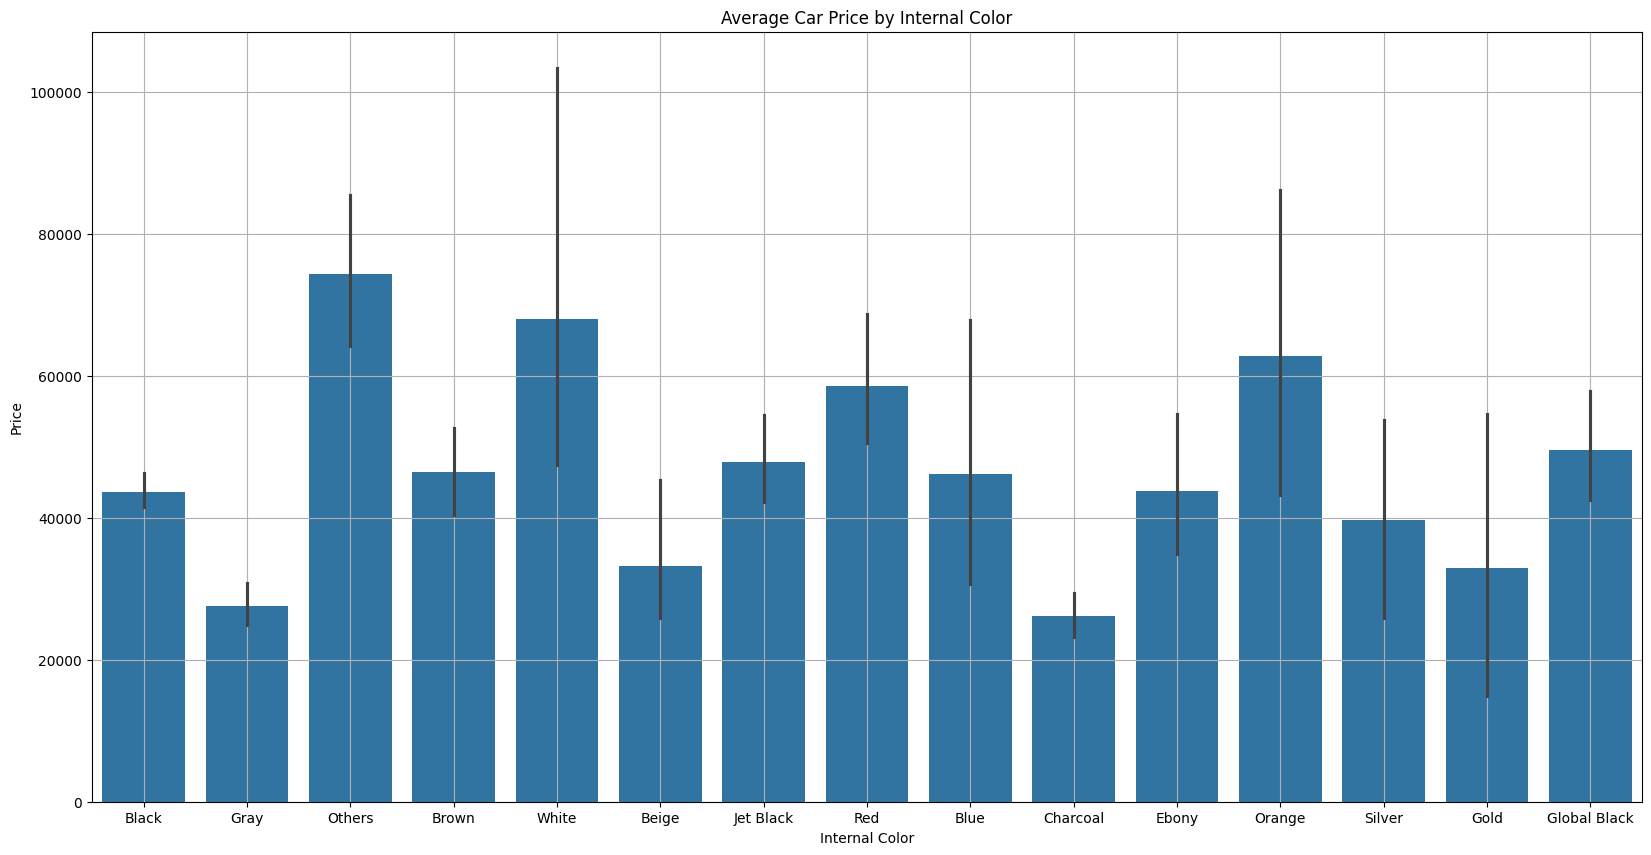

In [221]:
#Influence of internal colour on the price
plt.figure(figsize=(20, 10))
sns.barplot(x=df["int_col"], y=df["price (in $)"])
plt.title('Average Car Price by Internal Color')
plt.xlabel('Internal Color')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### External color

In [224]:
print(f"There are {len(df['ext_col'].value_counts().index)} categories of internal colours")
print("\n")
print(f"The categories are as follows: {df['ext_col'].value_counts().index}")
print("\n")
print(f"Number of null values: {df['ext_col'].isnull().sum()}")

There are 319 categories of internal colours


The categories are as follows: Index(['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown',
       'Gold', 'Beige',
       ...
       'Hydro Blue Pearlcoat', 'Sandstone Metallic', 'Portofino Blue Metallic',
       'Sangria Red', 'designo Diamond White', 'Anthracite Blue Metallic',
       'Moonlight Cloud', 'Silver Mist', 'Cirrus Silver Metallic', 'C / C'],
      dtype='object', name='ext_col', length=319)


Number of null values: 0


In [225]:
#Relation between external colors and Price
df.groupby("ext_col")["price (in $)"].mean().sort_values(ascending=False)

ext_col
Tempest                   599995.0
Balloon White             449991.0
China Blue                425000.0
Bianco Isis               399900.0
BLU ELEOS                 359991.0
                            ...   
Kinetic Blue               12999.0
Crimson Red Tintcoat       12433.0
Quartz Blue Pearl          11498.0
Twilight Blue Metallic      9995.0
Frozen White                9985.0
Name: price (in $), Length: 319, dtype: float64

In [226]:
#Top 15 categories
df['ext_col'].value_counts()[:15]

ext_col
Black                     905
White                     816
Gray                      496
Silver                    374
Blue                      349
Red                       261
Green                      74
Brown                      43
Gold                       42
Beige                      38
Orange                     36
Yellow                     29
–                          15
Bright White Clearcoat     14
Summit White               14
Name: count, dtype: int64

In [227]:
#Transformation
df.loc[:,"ext_col"]=np.where(df["ext_col"].isin(df['ext_col'].value_counts()[:15].index),df["ext_col"],"Others")
df.loc[:,"ext_col"]=np.where(df["ext_col"]!='–',df["ext_col"],"Others")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Others,Gray,At least 1 accident or damage reported,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,None reported,34999,9835,0,3


In [228]:
df.groupby("ext_col")["price (in $)"].mean().sort_values(ascending=False)

ext_col
Others                    65771.299228
Yellow                    54717.655172
Orange                    53426.527778
Red                       50502.264368
Gray                      45578.963710
Green                     45158.121622
White                     42604.754902
Bright White Clearcoat    41947.571429
Black                     40958.405525
Blue                      38715.865330
Summit White              37500.928571
Brown                     35220.860465
Silver                    32440.245989
Beige                     28169.473684
Gold                      17370.000000
Name: price (in $), dtype: float64

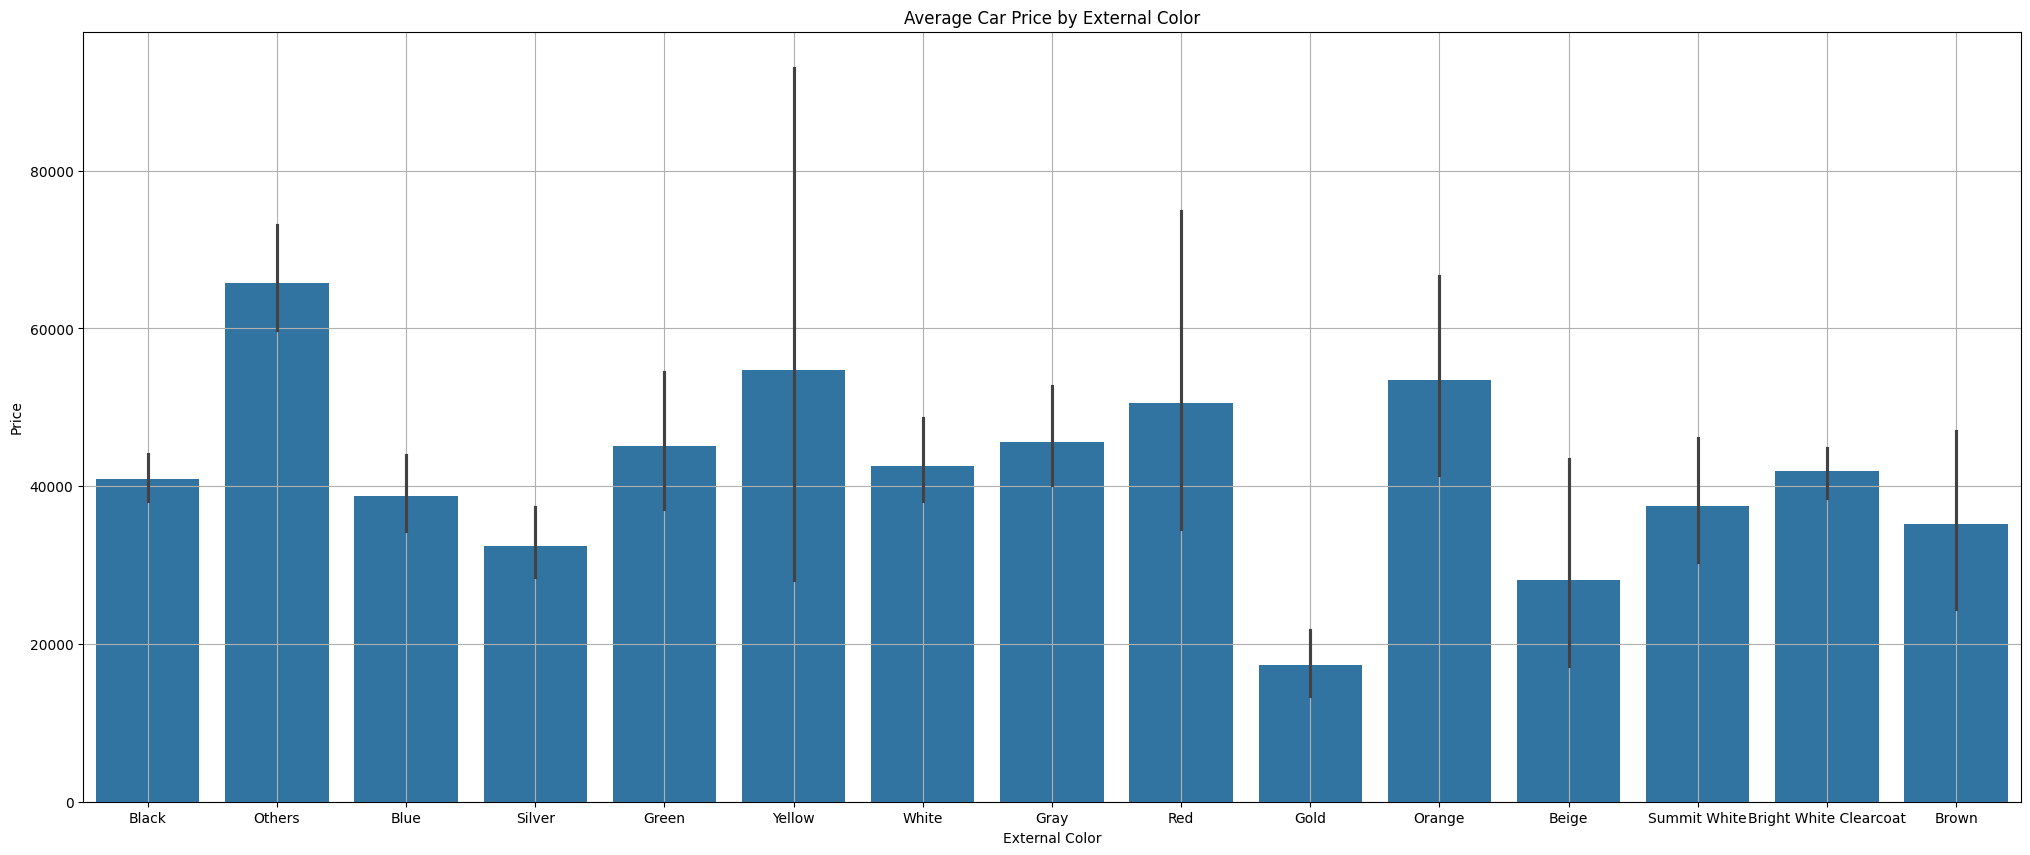

In [229]:
#Influence of external colour on the price
plt.figure(figsize=(25, 10))
sns.barplot(x=df["ext_col"], y=df["price (in $)"])
plt.title('Average Car Price by External Color')
plt.xlabel('External Color')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [230]:
# #Targeted encoding
# extColPrice=df.groupby("ext_col")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df['ext_col']=df['ext_col'].map(extColPrice)
# df.head()

In [231]:
# #Label encoding
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df["ext_col_encoded"]=le.fit_transform(df['ext_col'])
# df.drop("ext_col",axis=1,inplace=True)
# df.head()

### Accident column

In [232]:
#Handling null values
df["accident"]=df["accident"].fillna("None reported")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Others,Gray,At least 1 accident or damage reported,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,None reported,34999,9835,0,3


In [233]:
df['accident'].isnull().sum()

0

In [234]:
df['accident'].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [235]:
df.groupby("accident")["price (in $)"].mean().sort_values(ascending=False)

accident
None reported                             49681.072114
At least 1 accident or damage reported    28831.500000
Name: price (in $), dtype: float64

In [236]:
df['accident']=pd.get_dummies(df["accident"],dtype=int,drop_first=True)

In [237]:
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,0,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Others,Gray,0,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,1,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,1,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,3


### Transmission

In [238]:
#Top 20 categories
df["transmission"].value_counts().sort_values(ascending=False)[:20]

transmission
A/T                               1037
8-Speed A/T                        406
Transmission w/Dual Shift Mode     398
6-Speed A/T                        362
6-Speed M/T                        248
Automatic                          237
7-Speed A/T                        209
8-Speed Automatic                  176
10-Speed A/T                       119
5-Speed A/T                         86
9-Speed A/T                         74
6-Speed Automatic                   73
4-Speed A/T                         72
1-Speed A/T                         64
CVT Transmission                    62
5-Speed M/T                         59
10-Speed Automatic                  56
9-Speed Automatic                   47
M/T                                 40
Automatic CVT                       37
Name: count, dtype: int64

In [239]:
print(df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False))

transmission
7-Speed                              749950.0
8-SPEED A/T                          289991.0
Automatic, 8-Spd Dual-Clutch         238900.0
Manual                               220748.0
7-Speed DCT Automatic                215000.0
                                       ...   
Auto, 6-Spd w/CmdShft                 15900.0
6-Speed Automatic with Auto-Shift     15599.0
5-Speed A/T                           15000.0
5-Speed M/T                           12499.0
4-Speed A/T                           10725.0
Name: price (in $), Length: 62, dtype: float64


In [240]:
#Transformation
df.loc[:,"transmission"]=np.where(df["transmission"].isin(df['transmission'].value_counts()[:20].index),df["transmission"],"Others")
df.loc[:,"transmission"]=np.where(df["transmission"]!='–',df["transmission"],"Others")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,0,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Others,Gray,0,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,1,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,1,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,3


In [241]:
#Relation between price and transmission
df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False)

transmission
Others                            60000.0
10-Speed A/T                      57000.0
10-Speed Automatic                49072.0
Automatic                         47541.0
1-Speed A/T                       46249.5
8-Speed Automatic                 41599.0
9-Speed A/T                       40944.0
8-Speed A/T                       39625.0
9-Speed Automatic                 34562.0
Transmission w/Dual Shift Mode    34000.0
7-Speed A/T                       32999.0
6-Speed Automatic                 28499.0
6-Speed M/T                       26450.0
Automatic CVT                     25980.0
M/T                               22500.0
CVT Transmission                  21374.5
6-Speed A/T                       20900.0
A/T                               20500.0
5-Speed A/T                       15000.0
5-Speed M/T                       12499.0
4-Speed A/T                       10725.0
Name: price (in $), dtype: float64

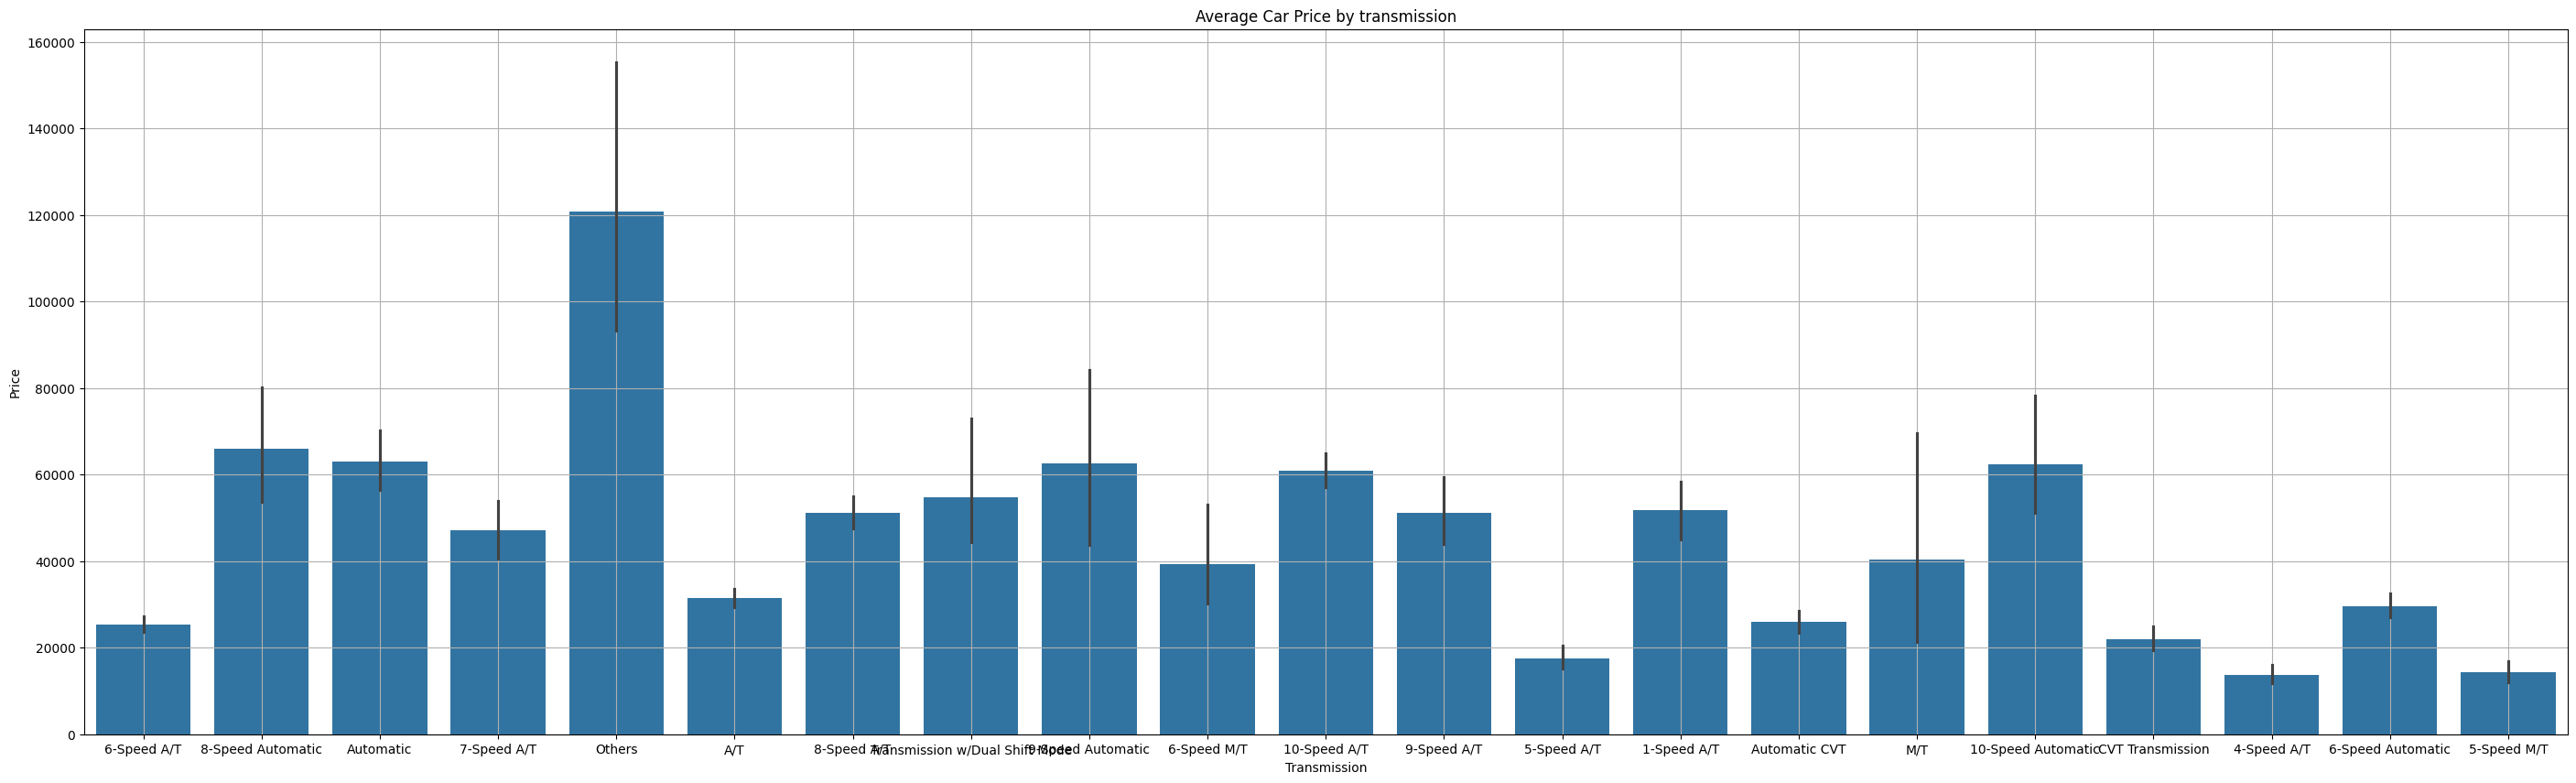

In [242]:
#Influence of transmission on the price
plt.figure(figsize=(35, 10))
sns.barplot(x=df["transmission"], y=df["price (in $)"])
plt.title('Average Car Price by transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [243]:
# #Target guided encoding
# from category_encoders import TargetEncoder

# encoder=TargetEncoder()
# df['transmission_encoded']=encoder.fit_transform(df['transmission'],df['price (in $)'])
# df.drop(['transmission'],axis=1,inplace=True)
# df.head()

In [244]:
# #Target encoding
# transmission_Price=df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df["transmission"]=df["transmission"].map(transmission_Price)
# df.head()

In [245]:
# #Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df["transmission_encoded"]=le.fit_transform(df['transmission'])
# df.drop("transmission",axis=1,inplace=True)
# df.head()

### Engine

In [246]:
df["engine"].isnull().sum()

0

In [247]:
#Top 20 categories
df['engine'].value_counts()[:20]

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             42
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel            40
5.7L V8 16V MPFI OHV                                     29
3.6L V6 24V MPFI DOHC                                    28
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            28
3.6L V6 24V GDI DOHC                                     28
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             24
268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            24
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            23
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             22
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            21
445.0HP 4.4L 8 Cylinder Engine Ga

In [248]:
#Transformation
df.loc[:,"engine"]=np.where(df["engine"].isin(df['engine'].value_counts()[:20].index),df["engine"],"Others")
df.loc[:,"engine"]=np.where(df["engine"]!='–',df["engine"],"Others")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,Others,6-Speed A/T,Black,Black,0,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,Others,8-Speed Automatic,Others,Gray,0,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,Others,Automatic,Blue,Black,1,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,Others,7-Speed A/T,Black,Black,1,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,3


In [249]:
df.groupby("engine")["price (in $)"].mean().sort_values(ascending=False)

engine
4.0L V8 32V GDI DOHC Twin Turbo                          168499.700000
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              86215.227273
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              60509.957447
3.5L V6 24V PDI DOHC Twin Turbo                           54407.350000
2.0L I4 16V GDI DOHC Turbo                                48753.057692
5.7L V8 16V MPFI OHV                                      48246.482759
Others                                                    44814.396441
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             43006.600000
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              42953.708333
3.6L V6 24V MPFI DOHC                                     38939.750000
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel              38317.020833
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel             36569.850000
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             32892.714286
445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel              31406.476190

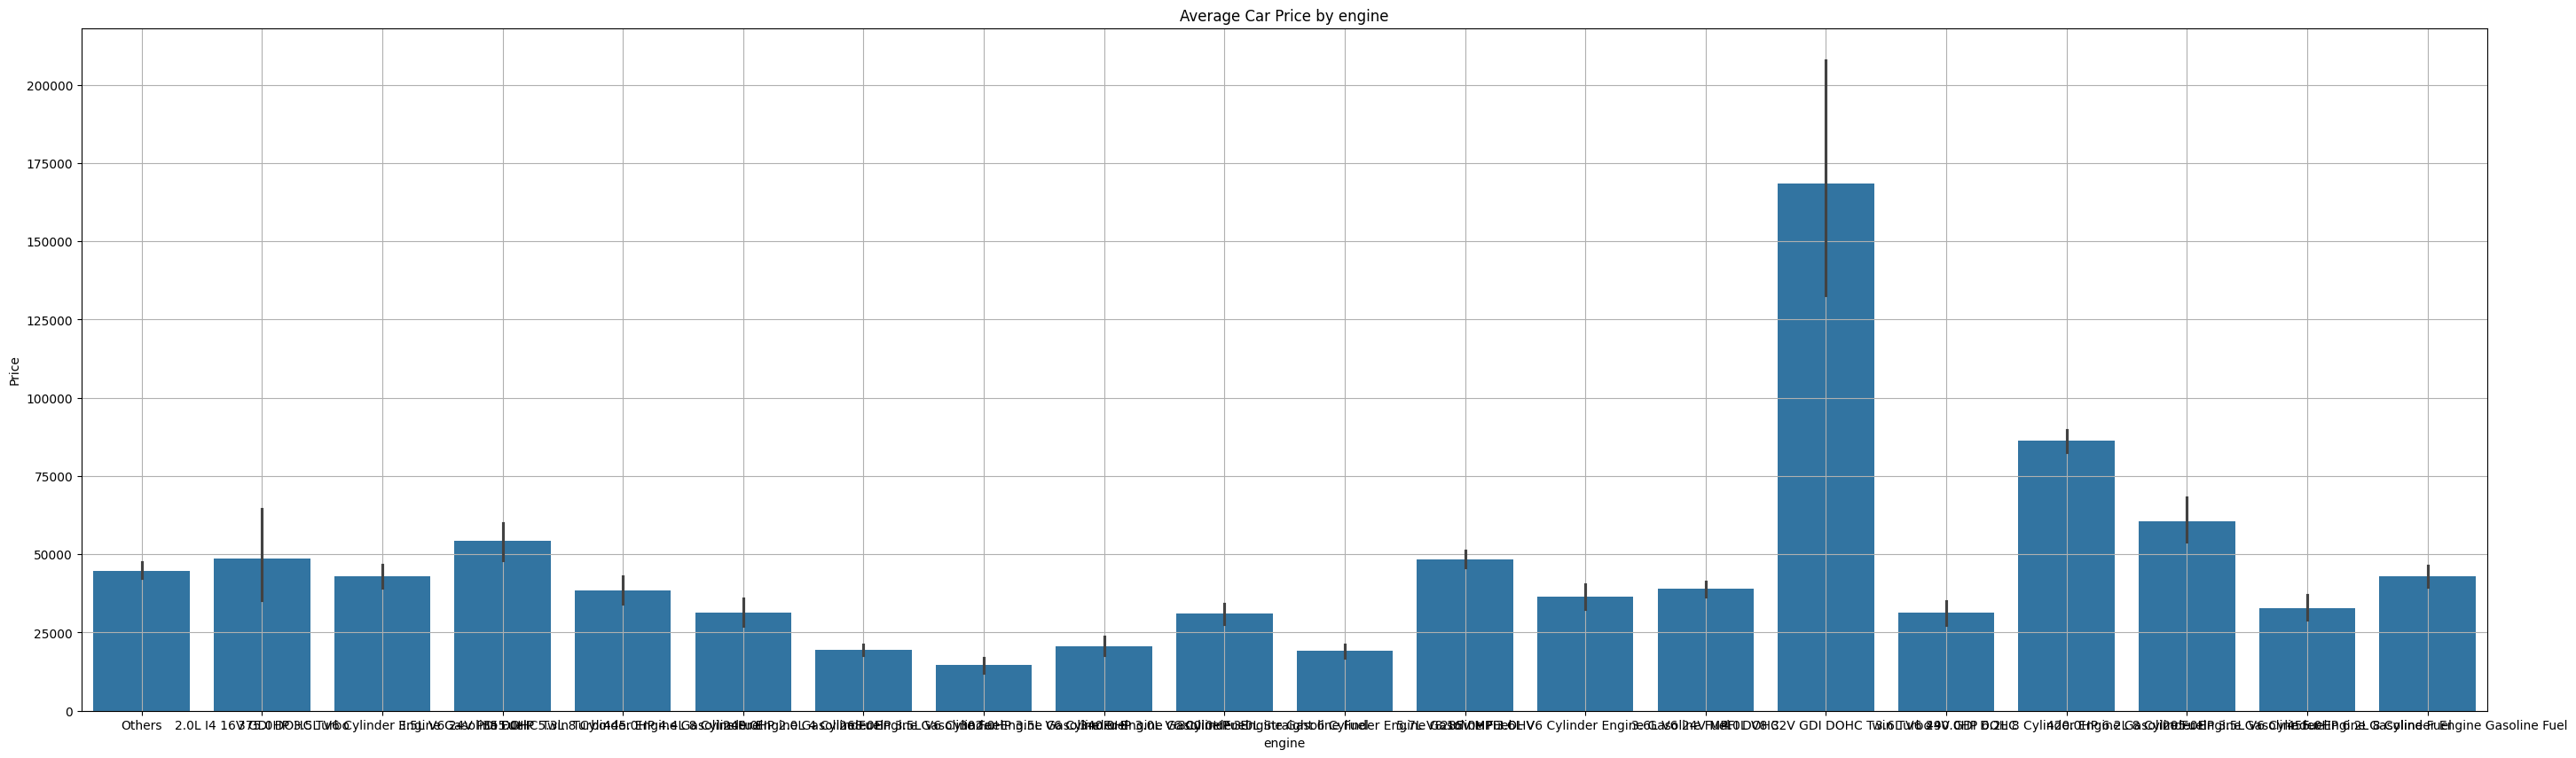

In [250]:
#Influence of engine on the price
plt.figure(figsize=(35, 10))
sns.barplot(x=df["engine"], y=df["price (in $)"])
plt.title('Average Car Price by engine')
plt.xlabel('engine')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [251]:
# #Target guided encoding
# from category_encoders import TargetEncoder

# encoder=TargetEncoder()
# df['engine_encoded']=encoder.fit_transform(df['engine'],df['price (in $)'])
# df.drop(['engine'],axis=1,inplace=True)
# df.head()

### Brand

In [252]:
print(f"Total numebr of brands : {len(df['brand'].value_counts().index)}")
pd.DataFrame(df['brand'].value_counts())

Total numebr of brands : 57


,count
brand,
Ford,386
BMW,375
Mercedes-Benz,315
Chevrolet,292
Porsche,201
Audi,200
Toyota,199
Lexus,163
Jeep,143


In [253]:
#Top 30 categories
df['brand'].value_counts()[:30]

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Name: count, dtype: int64

In [254]:
#Transformation
df.loc[:,"brand"]=np.where(df["brand"].isin(df['brand'].value_counts()[:30].index),df["brand"],"Others")
df.loc[:,"brand"]=np.where(df["brand"]!='–',df["brand"],"Others")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,Others,6-Speed A/T,Black,Black,0,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,Others,8-Speed Automatic,Others,Gray,0,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,Others,Automatic,Blue,Black,1,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,Others,7-Speed A/T,Black,Black,1,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,3


In [255]:
df.groupby("brand")["price (in $)"].mean().sort_values(ascending=False)

brand
Maserati         140582.529412
Bentley          137553.545455
Others            93971.033962
Porsche           88751.298507
Land              55764.061538
Mercedes-Benz     52075.765079
Tesla             48439.471264
RAM               43029.164835
Cadillac          41670.728972
BMW               41072.309333
Audi              39907.430000
GMC               37525.681319
Chevrolet         36722.739726
Ford              36240.880829
Lexus             35668.521472
Dodge             34500.544444
Jaguar            32362.723404
Jeep              31099.790210
Toyota            30026.000000
Lincoln           28330.884615
Kia               28096.421053
Acura             28034.078125
Volvo             26443.921053
Nissan            25905.120690
INFINITI          22927.644068
Volkswagen        22067.966102
Honda             21959.031746
Subaru            21495.156250
Mazda             20011.062500
Hyundai           18946.875000
MINI              14157.636364
Name: price (in $), dtype: float6

In [256]:
# #Target guided encoding
# from category_encoders import TargetEncoder

# encoder=TargetEncoder()
# df['brand_encoded']=encoder.fit_transform(df['brand'],df['price (in $)'])
# df.drop(['brand'],axis=1,inplace=True)
# df.head()

In [257]:
# Chances of data leakage
# brand_Price=df.groupby("brand")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df["brand"]=df["brand"].map(brand_Price)
# df.head()

### Fuel

In [258]:
df["fuel_type"].isnull().sum()

170

In [259]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [260]:
df.groupby("fuel_type")["price (in $)"].mean().sort_values(ascending=False)

fuel_type
Hybrid            51426.195876
Diesel            48695.422414
Plug-In Hybrid    45946.176471
Gasoline          44538.525839
–                 35745.888889
E85 Flex Fuel     22744.115108
not supported     14000.000000
Name: price (in $), dtype: float64

In [261]:
df["fuel_type"]=np.where(df["fuel_type"]=="–","not supported",df["fuel_type"])
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,Others,6-Speed A/T,Black,Black,0,10300,51000,1,11
1,Hyundai,Palisade SEL,Gasoline,Others,8-Speed Automatic,Others,Gray,0,38005,34742,1,3
2,Lexus,RX 350 RX 350,Gasoline,Others,Automatic,Blue,Black,1,54598,22372,0,2
3,INFINITI,Q50 Hybrid Sport,Hybrid,Others,7-Speed A/T,Black,Black,1,15500,88900,1,9
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,3


In [262]:
# Number of null values in the 'fuel_type' column
num_nulls = df['fuel_type'].isnull().sum()

# Sample non-null 'fuel_type' values
sampled_values = df['fuel_type'].dropna().sample(num_nulls, random_state=0, replace=True).values

# Assign the sampled values to the positions where 'fuel_type' is null
df.loc[df['fuel_type'].isnull(), 'fuel_type'] = sampled_values

In [263]:
df.groupby("fuel_type")["price (in $)"].mean().sort_values(ascending=False)

fuel_type
Hybrid            51282.450495
Diesel            48973.491803
Plug-In Hybrid    47782.416667
Gasoline          44974.546798
not supported     36091.220000
E85 Flex Fuel     23973.175676
Name: price (in $), dtype: float64

In [264]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3451
Hybrid             202
E85 Flex Fuel      148
Diesel             122
not supported       50
Plug-In Hybrid      36
Name: count, dtype: int64

In [265]:
categoryCount=df['fuel_type'].value_counts()
[f"{categoryCount.index[i]} -> {categoryCount.values[i]}"for i in range(len(categoryCount))]

['Gasoline -> 3451',
 'Hybrid -> 202',
 'E85 Flex Fuel -> 148',
 'Diesel -> 122',
 'not supported -> 50',
 'Plug-In Hybrid -> 36']

In [266]:
df['fuel_type'].isnull().sum()

0

In [267]:
# #Target guided encoding
# from category_encoders import TargetEncoder

# encoder=TargetEncoder()
# df['fuel_type_encoded']=encoder.fit_transform(df['fuel_type'],df['price (in $)'])
# df.drop(['fuel_type'],axis=1,inplace=True)
# df.head()

In [268]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['fuel_type_Encoded']=le.fit_transform(df['fuel_type'])
# df.head()

### Model

In [269]:
df['model'].isnull().sum()

0

In [270]:
df['model'].value_counts()

model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

In [271]:
#Top 20 categories
df['model'].value_counts()[:20]

model
M3 Base                  30
F-150 XLT                24
Corvette Base            22
1500 Laramie             18
Camaro 2SS               17
Wrangler Sport           17
Model Y Long Range       17
Mustang GT Premium       16
911 Carrera              16
M4 Base                  15
Explorer XLT             14
911 Carrera S            14
F-250 Lariat             14
M5 Base                  13
E-Class E 350 4MATIC     13
E-Class E 350            13
F-150 Lariat             13
R1S Adventure Package    12
F-250 XLT                12
ES 350 Base              12
Name: count, dtype: int64

In [272]:
#Influence of model over price
print("Grouping by mean of price:\n",df.groupby("model")["price (in $)"].mean())

Grouping by mean of price:
 model
124 Spider Abarth         22500.000000
128 i                     18000.000000
135 i                     13933.333333
135 is                    29000.000000
1500 Big Horn             38601.909091
                              ...     
i8 Base                   78189.800000
tC Anniversary Edition    11246.500000
tC Base                    7100.000000
tC Release Series 6.0      6500.000000
xB Base                    8000.000000
Name: price (in $), Length: 1898, dtype: float64


In [274]:
#Transformation
df.loc[:,"model"]=np.where(df["model"].isin(df['model'].value_counts()[:20].index),df["model"],"Others")

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age
0,Ford,Others,E85 Flex Fuel,Others,6-Speed A/T,Black,Black,0,10300,51000,1,11
1,Hyundai,Others,Gasoline,Others,8-Speed Automatic,Others,Gray,0,38005,34742,1,3
2,Lexus,Others,Gasoline,Others,Automatic,Blue,Black,1,54598,22372,0,2
3,INFINITI,Others,Hybrid,Others,7-Speed A/T,Black,Black,1,15500,88900,1,9
4,Audi,Others,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,BMW,Others,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Beige,1,24950,76009,1,8
96,Jeep,Others,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Others,Black,1,39366,31349,0,4
97,Lexus,Others,Gasoline,Others,Transmission w/Dual Shift Mode,Orange,Red,1,32900,48000,1,9
98,BMW,Others,Gasoline,Others,6-Speed A/T,Black,Black,1,8900,91420,1,19


In [ ]:
# #Target guided encoding
# from category_encoders import TargetEncoder

# encoder=TargetEncoder()
# df['model_encoded']=encoder.fit_transform(df['model'],df['price (in $)'])
# df.drop(['model'],axis=1,inplace=True)
# df.head()

,accident,not_clean_title,Age,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,engine_encoded,brand_encoded,fuel_type_encoded,model_encoded
0,0,1,11,10300,51000,14,29,25450.044199,39431.914328,36240.880829,23973.232492,39313.750620
1,0,1,3,38005,34742,71,185,66071.808887,44029.715721,19087.358900,44974.546798,42799.774211
2,1,0,2,54598,22372,14,38,63105.021090,46198.538269,35668.526945,44974.546798,45860.105184
3,1,1,9,15500,88900,14,29,47249.669840,40749.497945,23356.701517,51282.450411,40773.124054
4,1,0,3,34999,9835,14,120,66071.808887,48588.566851,39907.430071,44974.546798,43310.109195


In [ ]:
# Chances of Data Leakage and may lead to overfitting
##Target guided encoding
# model_Price=df.groupby("model")["price (in $)"].median().sort_values(ascending=False).to_dict()
# df["model_encoded_Price"]=df["model"].map(model_Price)
# df.drop("model",axis=1,inplace=True)
# df.head()

### Handling outliers in the Age

<Axes: ylabel='Age'>

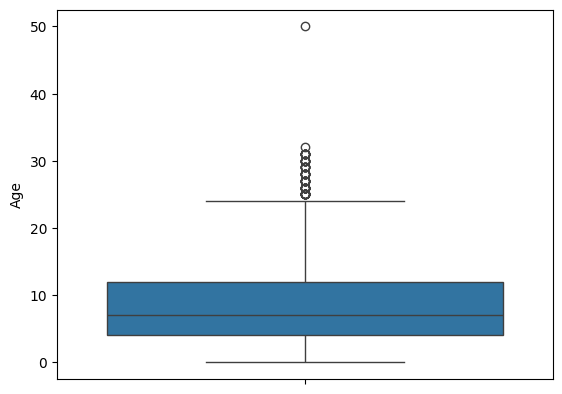

In [276]:
sns.boxplot(data=df["Age"])

In [277]:
df["Age"].isnull().sum()

0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Age_log'>

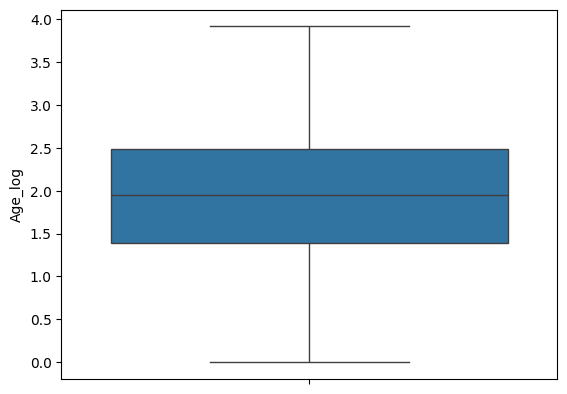

In [278]:
df['Age_log'] = np.log(df['Age'])
df.drop('Age', axis=1, inplace=True)
sns.boxplot(data=df["Age_log"])

In [282]:
df.isnull().sum()

brand                 0
model                 0
fuel_type             0
engine                0
transmission          0
ext_col               0
int_col               0
accident              0
price (in $)          0
mileage (in miles)    0
not_clean_title       0
Age_log               0
dtype: int64

In [283]:
df.corr()["price (in $)"]

ValueError: could not convert string to float: 'Ford'

In [284]:
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,price (in $),mileage (in miles),not_clean_title,Age_log
0,Ford,Others,E85 Flex Fuel,Others,6-Speed A/T,Black,Black,0,10300,51000,1,2.397895
1,Hyundai,Others,Gasoline,Others,8-Speed Automatic,Others,Gray,0,38005,34742,1,1.098612
2,Lexus,Others,Gasoline,Others,Automatic,Blue,Black,1,54598,22372,0,0.693147
3,INFINITI,Others,Hybrid,Others,7-Speed A/T,Black,Black,1,15500,88900,1,2.197225
4,Audi,Others,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Others,Black,1,34999,9835,0,1.098612


In [ ]:
X,y=df.drop('price (in $)',axis=1),df['price (in $)']

### Transformation

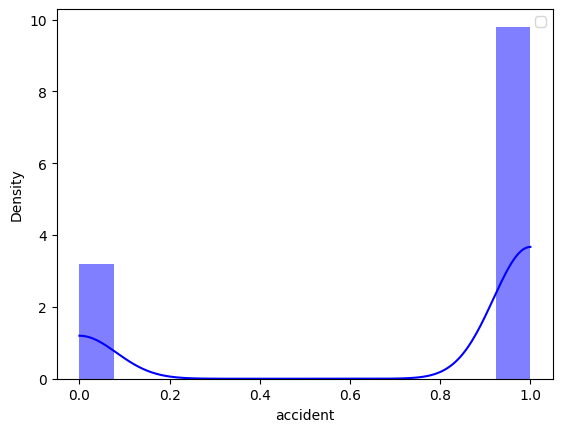

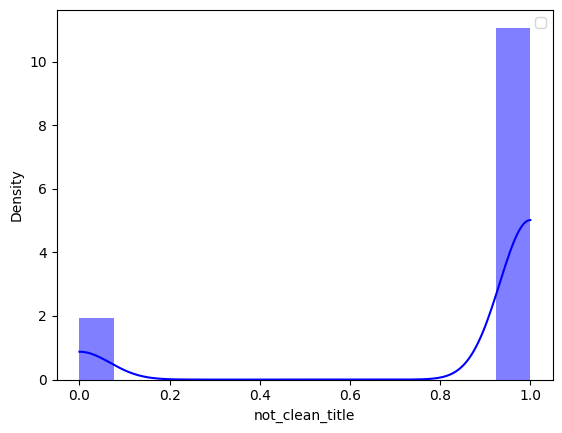

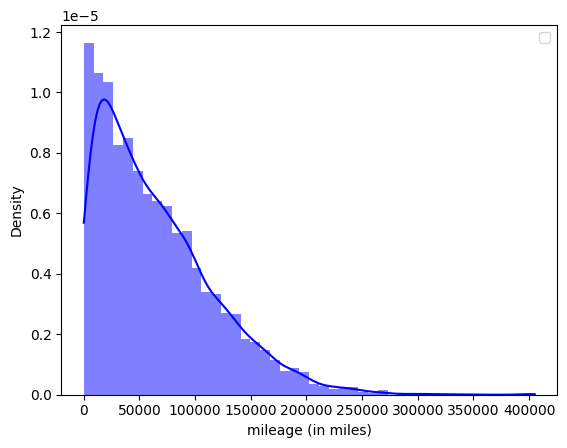

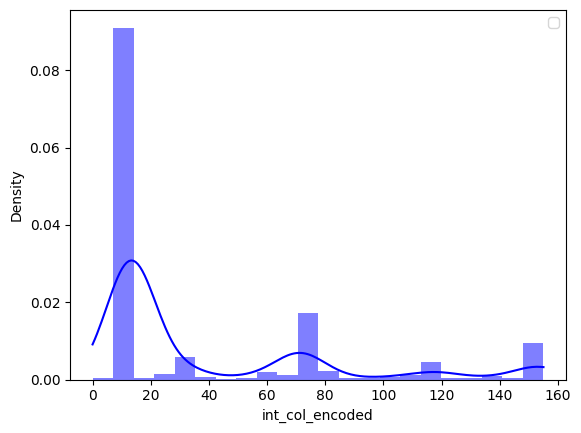

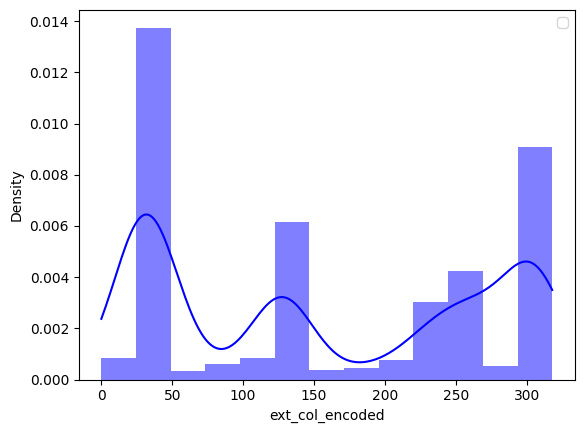

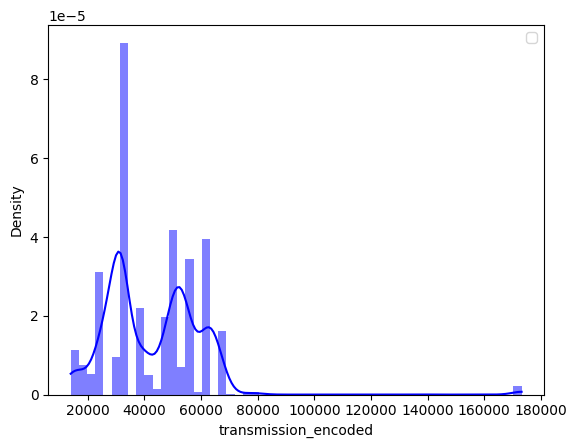

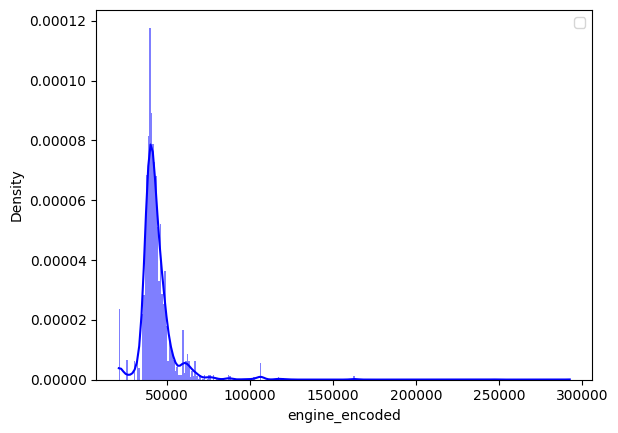

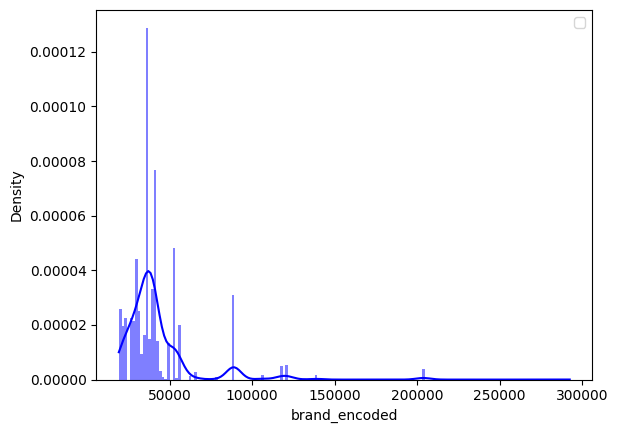

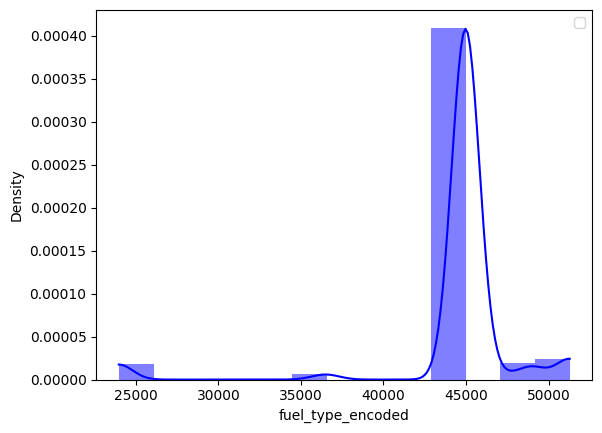

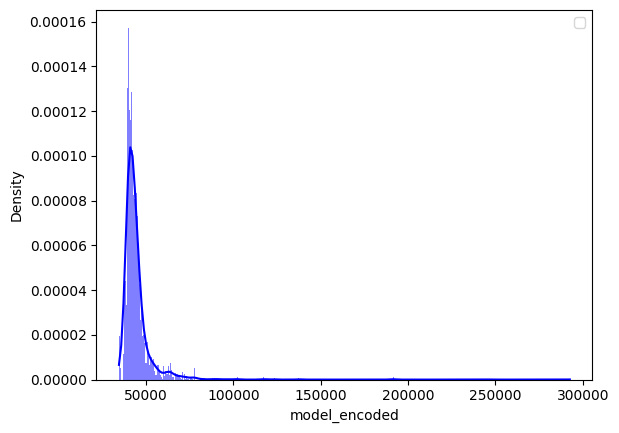

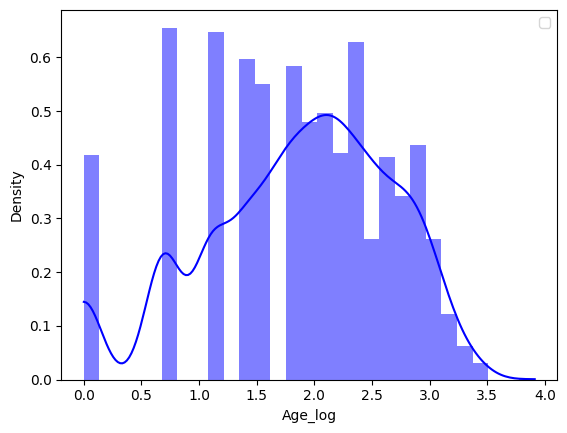

In [ ]:
#Observing data distribution of all the datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of features
for column in X.columns:
    sns.histplot(X[column], color="blue",legend='Data', kde=True, stat="density", linewidth=0)
    plt.legend()
    plt.show()

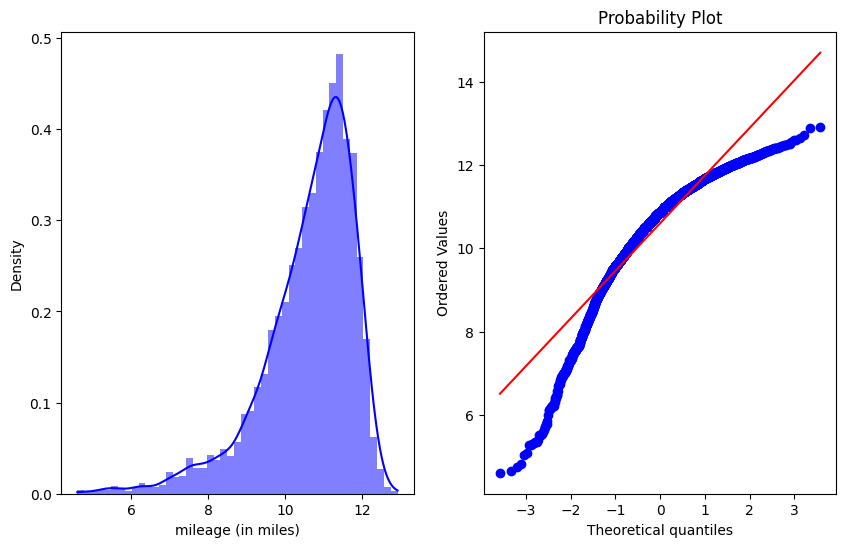

In [ ]:
#Log Trnsformation
import numpy as np
from scipy import stats as stat

# Log transformation
transformed = np.log(df['mileage (in miles)'].replace(0, np.nan)).replace(np.nan, 0)

def plot_transformed_data(feature,transformed):
    # Visualize distribution of transformed data
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(transformed, color="blue", kde=True, stat="density", linewidth=0)
    plt.subplot(1,2,2)
    stat.probplot(transformed,dist='norm',plot=plt)
    plt.show()

plot_transformed_data('mileage (in miles)',transformed)

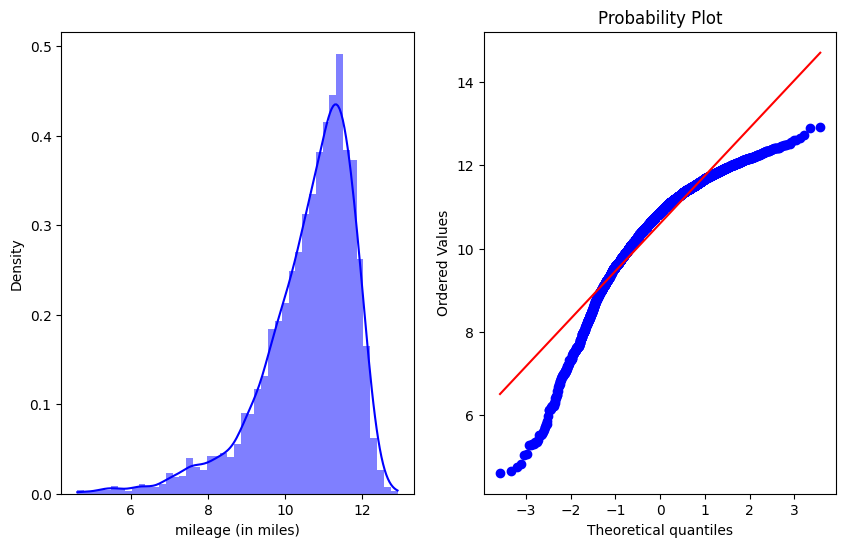

In [ ]:
#Log1pTransformation
transformed=np.log1p(df['mileage (in miles)'])
plot_transformed_data('mileage (in miles)',transformed)

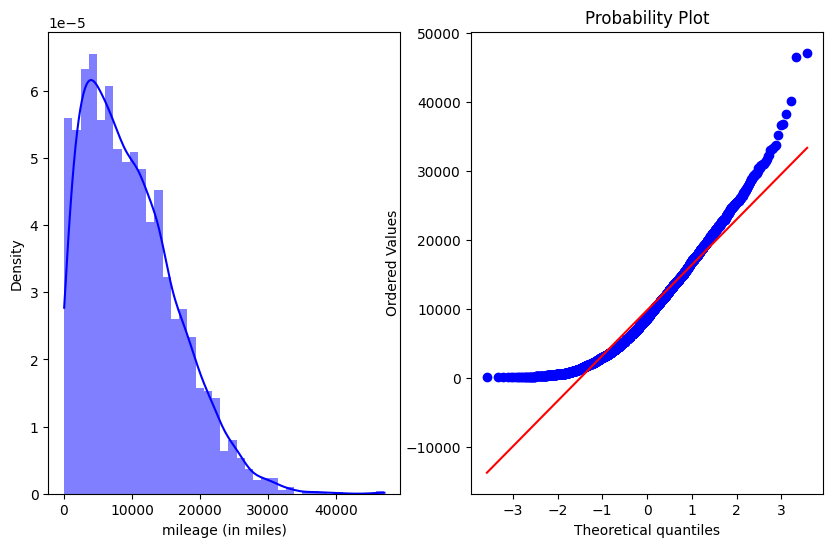

In [ ]:
#Exponential Transformation
transformed=df['mileage (in miles)']**(1/1.2)
plot_transformed_data('mileage (in miles)',transformed)

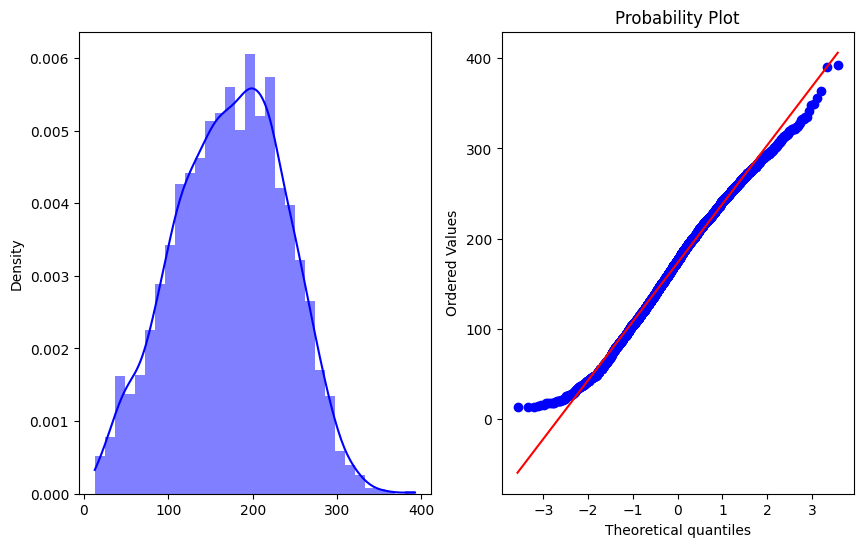

In [ ]:
#Box-Cox transformation
transformed,lam=stat.boxcox(df['mileage (in miles)'])
plot_transformed_data('mileage (in miles)',transformed)

### Performing box cox transformation

In [ ]:
transformed,lam=stat.boxcox(df['mileage (in miles)'])
df['mileage (in miles)']=transformed
df.head()

,accident,not_clean_title,price (in $),mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,engine_encoded,brand_encoded,fuel_type_encoded,model_encoded,Age_log
0,0,1,10300,173.408869,14,29,25450.044199,39431.914328,36240.880829,23973.232492,39313.750620,2.397895
1,0,1,38005,148.932051,71,185,66071.808887,44029.715721,19087.358900,44974.546798,42799.774211,1.098612
2,1,0,54598,125.028089,14,38,63105.021090,46198.538269,35668.526945,44974.546798,45860.105184,0.693147
3,1,1,15500,216.011714,14,29,47249.669840,40749.497945,23356.701517,51282.450411,40773.124054,2.197225
4,1,0,34999,90.026593,14,120,66071.808887,48588.566851,39907.430071,44974.546798,43310.109195,1.098612


In [ ]:
X,y=df.drop('price (in $)',axis=1),df['price (in $)']

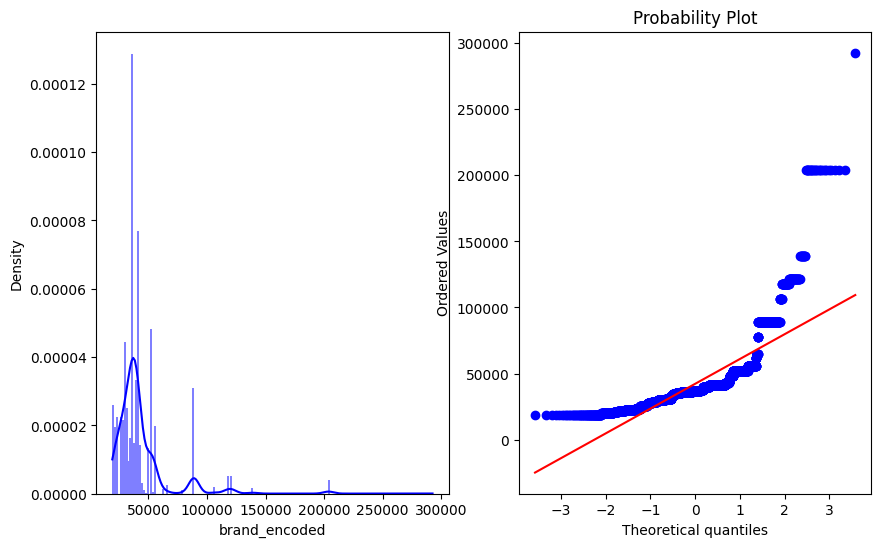

In [ ]:
plot_transformed_data('model',df['brand_encoded'])

### Feature Scaling

In [ ]:
from sklearn.impute import SimpleImputer
X[np.isinf(X)] = np.nan  # Replace infinity with NaN
imp = SimpleImputer(strategy='mean')  # Example imputation strategy
X_inpute = imp.fit_transform(X)
X=pd.DataFrame(X_inpute,columns=X.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,accident,not_clean_title,mileage (in miles),int_col_encoded,ext_col_encoded,transmission_encoded,engine_encoded,brand_encoded,fuel_type_encoded,model_encoded,Age_log
0,0.0,1.0,0.422979,0.090323,0.091195,0.072260,0.067225,0.062716,0.000000,0.018398,0.612955
1,0.0,1.0,0.358480,0.458065,0.581761,0.327313,0.084165,0.000000,0.769019,0.031908,0.280830
2,1.0,0.0,0.295491,0.090323,0.119497,0.308685,0.092156,0.060624,0.769019,0.043768,0.177184
3,1.0,1.0,0.535243,0.090323,0.091195,0.209133,0.072079,0.015609,1.000000,0.024054,0.561659
4,1.0,0.0,0.203258,0.090323,0.377358,0.327313,0.100962,0.076122,0.769019,0.033886,0.280830


### Train-Test-Val split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)

### Linear Regression

In [ ]:
df.corr()["price (in $)"]

accident                0.114088
not_clean_title        -0.085710
price (in $)            1.000000
mileage (in miles)     -0.365595
int_col_encoded         0.064821
ext_col_encoded         0.004035
transmission_encoded    0.306012
engine_encoded          0.731459
brand_encoded           0.474709
fuel_type_encoded       0.056321
model_encoded           0.838209
Age_log                -0.230623
Name: price (in $), dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

print(f"Train score of Linear Regression: {lr.score(X_train,y_train)}")
print(f"Train loss of Linear Regression: {1-lr.score(X_train,y_train)}")
print("\n")
print(f"Test score of Linear Regression: {lr.score(X_test,y_test)}")
print(f"Test loss of Linear Regression: {1-lr.score(X_test,y_test)}")

Train score of Linear Regression: 0.8775602731646526
Train loss of Linear Regression: 0.12243972683534743


Test score of Linear Regression: 0.6608075281600381
Test loss of Linear Regression: 0.33919247183996193


### SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

sgd.fit(X_train,y_train)

print(f"Train score of SGD Regression: {sgd.score(X_train,y_train)}")
print(f"Train loss of SGD Regression: {1-sgd.score(X_train,y_train)}")
print("\n")
print(f"Val score of SGD Regression: {sgd.score(X_val,y_val)}")
print(f"Val loss of SGD Regression: {1-sgd.score(X_val,y_val)}")
print("\n")
print(f"Test score of SGD Regression: {sgd.score(X_test,y_test)}")
print(f"Test loss of SGD Regression: {1-sgd.score(X_test,y_test)}")

Train score of SGD Regression: 0.7627179382952435
Train loss of SGD Regression: 0.23728206170475652


Val score of SGD Regression: 0.6611966542947597
Val loss of SGD Regression: 0.3388033457052403


Test score of SGD Regression: 0.4636864704712418
Test loss of SGD Regression: 0.5363135295287582


### Decision Tree and Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [ ]:
dt.fit(X,y)
rf.fit(X,y)

print(f"Important features for decision tree: {dt.feature_importances_}")
print(f"Important features for random forest: {rf.feature_importances_}")


Important features for decision tree: [1.25945392e-04 6.45059062e-05 1.12187931e-01 1.99113071e-03
 2.82697432e-02 2.17858793e-03 2.31358400e-02 3.47432978e-03
 1.17201274e-03 6.76557810e-01 1.50842163e-01]
Important features for random forest: [9.92624640e-03 3.79777954e-04 6.26056158e-02 5.48076453e-03
 1.92153129e-02 3.48191861e-03 1.27768785e-01 2.16265673e-02
 7.17863258e-04 6.73988125e-01 7.48090230e-02]


### Baseline Model

In [ ]:
model0=dt.fit(X_train,y_train)
model1=rf.fit(X_train,y_train)

print(f"Train score of Decision Tree: {model0.score(X_train,y_train)}")
print(f"Train score of Random Forest: {model1.score(X_train,y_train)}")
print("\n")
print(f"Train loss of Decision Tree: {1-model0.score(X_train,y_train)}")
print(f"Train loss of Random Forest: {1-model1.score(X_train,y_train)}")

Train score of Decision Tree: 1.0
Train score of Random Forest: 0.9894505943284044


Train loss of Decision Tree: 0.0
Train loss of Random Forest: 0.010549405671595569


In [ ]:
print(f"Val score of Decision Tree: {model0.score(X_val,y_val)}")
print(f"Val score of Random Forest: {model1.score(X_val,y_val)}")
print("\n")
print(f"Val loss of Decision Tree: {1-model0.score(X_val,y_val)}")
print(f"Val loss of Random Forest: {1-model1.score(X_val,y_val)}")

Val score of Decision Tree: 0.6010967439798893
Val score of Random Forest: 0.6841696509025312


Val loss of Decision Tree: 0.3989032560201107
Val loss of Random Forest: 0.31583034909746877


In [ ]:
print(f"Test score of Decision Tree: {model0.score(X_test,y_test)}")
print(f"Test score of Random Forest: {model1.score(X_test,y_test)}")
print("\n")
print(f"Test loss of Decision Tree: {1-model0.score(X_test,y_test)}")
print(f"Test loss of Random Forest: {1-model1.score(X_test,y_test)}")

Test score of Decision Tree: 0.49650316559518826
Test score of Random Forest: 0.48417111877340346


Test loss of Decision Tree: 0.5034968344048117
Test loss of Random Forest: 0.5158288812265965


### HyperParameter Tuning

In [ ]:
param_grid_dt = {
    'max_depth': [7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter':['best','random'],
    'random_state':[42],
    'max_features':[1.0,'sqrt','log2']
}

param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')

In [ ]:
from sklearn.model_selection import cross_val_score
grid_search_dt.fit(X, y)

print(f"Best parameters for decision tree: {grid_search_dt.best_params_}")
print(f"Best score for decision tree: {grid_search_dt.best_score_}")

Best parameters for decision tree: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Best score for decision tree: 0.707265916955293


In [ ]:
model2=DecisionTreeRegressor(max_depth=10,max_features= 1.0,min_samples_leaf=1,min_samples_split=2, random_state= 42, splitter= 'random')

model2.fit(X_train,y_train)

print(f"Cross validation score for decision tree: {cross_val_score(model2, X_train, y_train, cv=5, scoring='r2').mean()}")

Cross validation score for decision tree: 0.8123139555925502


In [ ]:
print(f"Validation score of Decision Tree: {model2.score(X_val,y_val)}")
print(f"Test score of Decision Tree: {model2.score(X_test,y_test)}")

Validation score of Decision Tree: 0.5234027433241788
Test score of Decision Tree: 0.5033300017031459


### XGB Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f"Train score of XGB Regressor: {xgb.score(X_train,y_train)}")
print(f"Train loss of XGB Regressor: {1-xgb.score(X_train,y_train)}")
print("\n")
print(f"Val score of XGB Regressor: {xgb.score(X_val,y_val)}")
print(f"Val loss of XGB Regressor: {1-xgb.score(X_val,y_val)}")
print("\n")
print(f"Test score of XGB Regressor: {xgb.score(X_test,y_test)}")
print(f"Test loss of XGB Regressor: {1-xgb.score(X_test,y_test)}")

Train score of XGB Regressor: 0.9987400356671388
Train loss of XGB Regressor: 0.0012599643328612409


Val score of XGB Regressor: 0.8116967082103502
Val loss of XGB Regressor: 0.18830329178964977


Test score of XGB Regressor: 0.42981473573158757
Test loss of XGB Regressor: 0.5701852642684124
